In [1]:
#Notes:

# get the prophet prediction table data for each cryptocurrency so that we can compare 
# the predited close data with the actual close data for a day and how close the prediciton was.
# finishing writing up the README to include all the new information generated plut the points for the bootcamp project
# git push all this new stuff to the github
# For API -Kevin: should only need one API for the trend data since all 3 currencies data are being pulled from the trend data

In [2]:
!pip install prophet

import pandas as pd
import datetime
from prophet import Prophet
import csv
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import requests

In [3]:
# import Bitcoin (BTC), Ethereum (ETH), and Dogecoin (DOGE) csv files

btc_df = pd.read_csv('CSV_files/BTC_1Year_Data.csv')
eth_df = pd.read_csv('CSV_files/ETH_1Year_Data.csv')
doge_df = pd.read_csv('CSV_files/DOGE_1Year_Data.csv')


In [4]:
# Rename the "close" column to "price" in all of the csv files

btc_df.rename(columns={'close': 'price'}, inplace=True) 
eth_df.rename(columns={'close': 'price'}, inplace=True) 
doge_df.rename(columns={'close': 'price'}, inplace=True) 



/var/folders/sb/3cvttk6j78s7j3dzy77nkw140000gn/T/ipykernel_8534/2418237702.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  btc_df['time'] = pd.to_datetime(btc_df['time'])


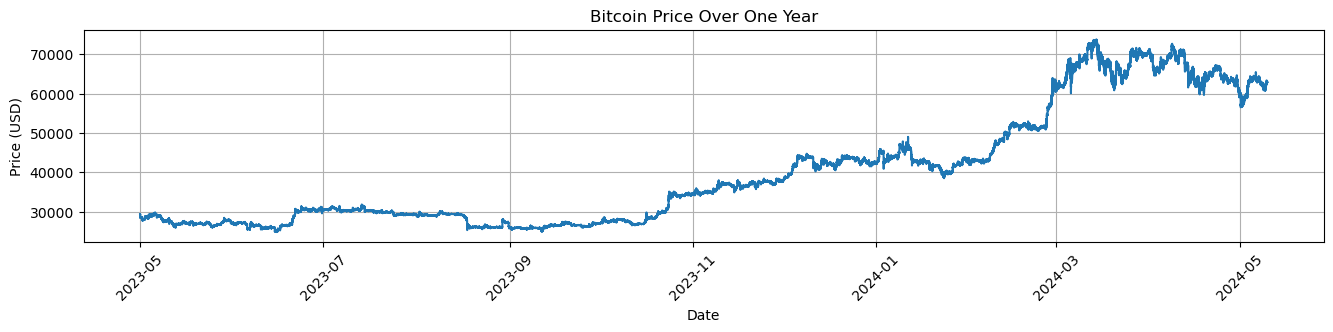

In [5]:
# Plot the "price" data for btc using "time" as the x-axis 

btc_df['time'] = pd.to_datetime(btc_df['time'])

btc_df.set_index("time", inplace = True)

plt.figure(figsize=(16, 4))
plt.plot(btc_df['price'])
plt.title("Bitcoin Price Over One Year")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation = 45)
plt.grid(True)
plt.subplots_adjust(bottom = 0.35)
plt.savefig('btc_price_one_year_graph.png')
plt.show()


/var/folders/sb/3cvttk6j78s7j3dzy77nkw140000gn/T/ipykernel_8534/2561443159.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eth_df['time'] = pd.to_datetime(eth_df['time'])


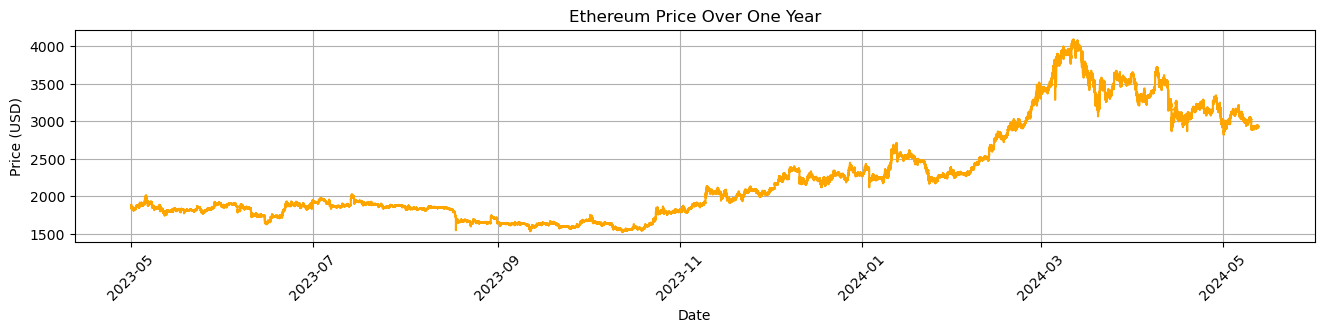

In [6]:
# Plot the "price" data for eth using "time" as the x-axis 

eth_df['time'] = pd.to_datetime(eth_df['time'])

eth_df.set_index("time", inplace = True)

plt.figure(figsize=(16, 4))
plt.plot(eth_df['price'], color = "orange")
plt.title("Ethereum Price Over One Year")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation = 45)
plt.grid(True)
plt.subplots_adjust(bottom = 0.35)
plt.savefig('eth_price_one_year_graph.png')
plt.show()



/var/folders/sb/3cvttk6j78s7j3dzy77nkw140000gn/T/ipykernel_8534/1085923417.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  doge_df['time'] = pd.to_datetime(doge_df['time'])


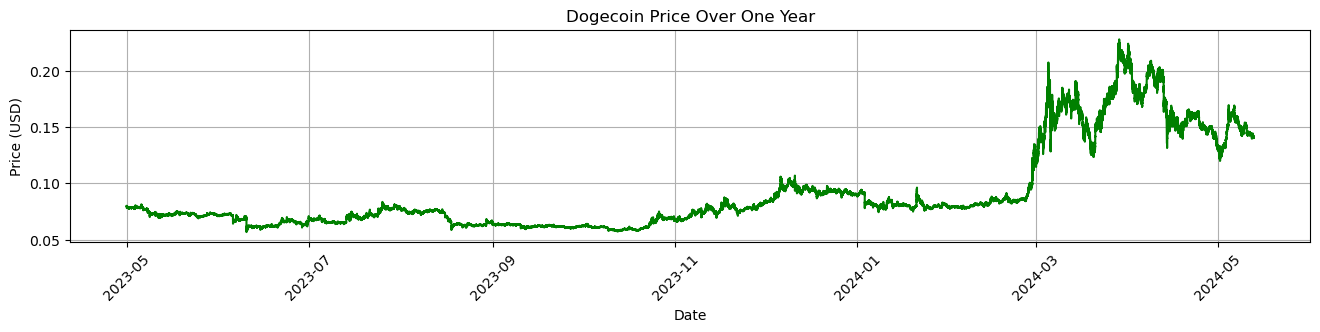

In [7]:
# Plot the "price" data for doge using "time" as the x-axis 

doge_df['time'] = pd.to_datetime(doge_df['time'])

doge_df.set_index("time", inplace = True)

plt.figure(figsize=(16, 4))
plt.plot(doge_df['price'], color = "green")
plt.title("Dogecoin Price Over One Year")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation = 45)
plt.grid(True)
plt.subplots_adjust(bottom = 0.35)
plt.savefig('doge_price_one_year_graph.png')
plt.show()


,BTC_Price,ETH_Price,DOGE_Price
time,,,
2023-05-01 00:01:00,29291.31,1877.16,0.07954
2023-05-01 00:02:00,29230.60,1875.02,0.07945
2023-05-01 00:03:00,29283.42,1879.31,0.07960
2023-05-01 00:04:00,29308.98,1881.91,0.07970
2023-05-01 00:05:00,29302.16,1880.48,0.07968


,BTC_Price,ETH_Price,DOGE_Price
time,,,
2024-05-10 04:16:00,62844.02,3027.01,0.15082
2024-05-10 04:17:00,62865.37,3027.02,0.15091
2024-05-10 04:18:00,62916.31,3029.41,0.15104
2024-05-10 04:19:00,62918.34,3029.29,0.15105
2024-05-10 04:20:00,62936.86,3030.24,0.15136


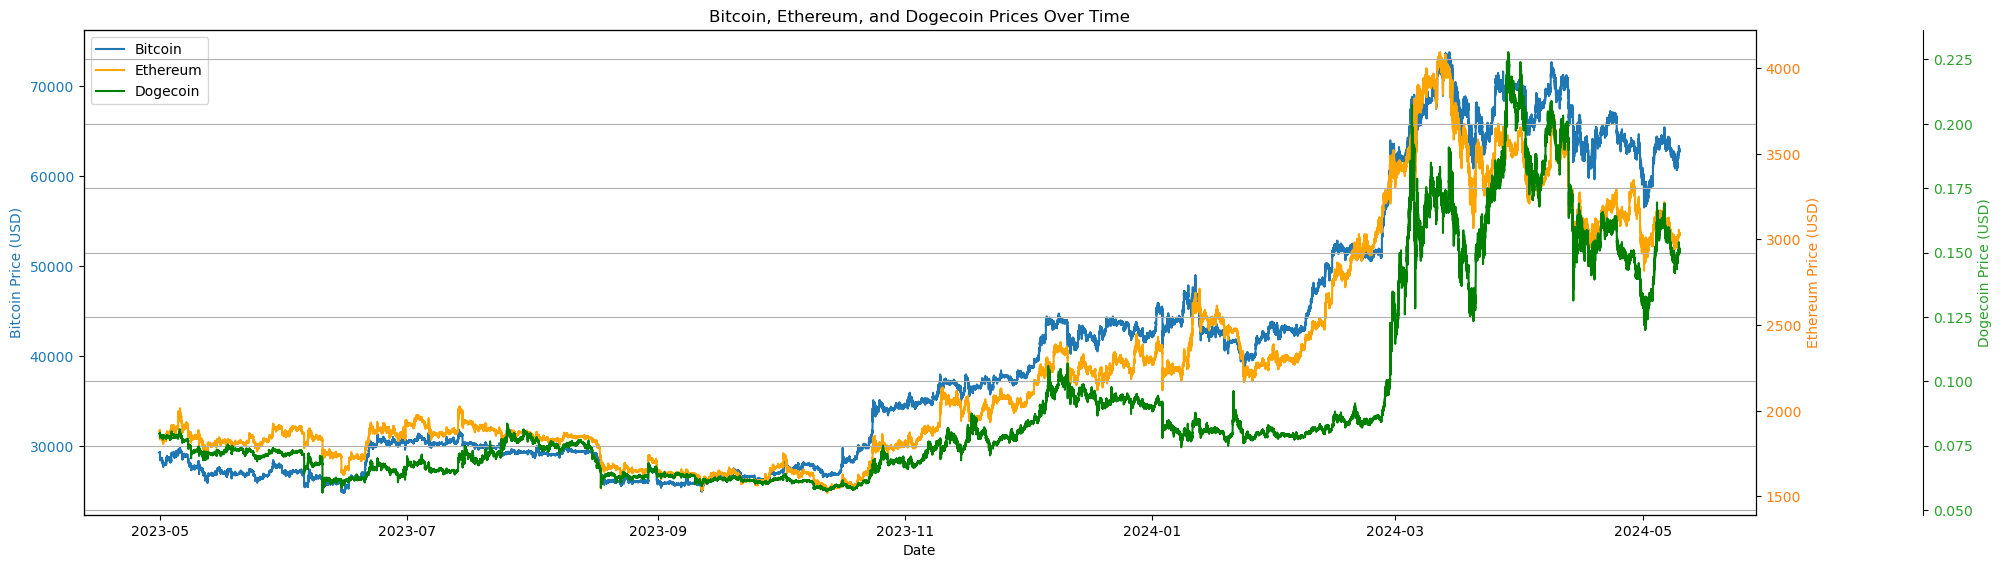

In [8]:
# Concat all three cryptocurrencies based on "price" and then plot into one graph.

btc_df = btc_df[~btc_df.index.duplicated(keep='first')]
eth_df = eth_df[~eth_df.index.duplicated(keep='first')]
doge_df = doge_df[~doge_df.index.duplicated(keep='first')]

crypto_close_data_df = pd.concat([btc_df['price'], eth_df['price'], doge_df['price']], axis=1, keys=['BTC_Price', 'ETH_Price', 'DOGE_Price']).dropna()

display(crypto_close_data_df.head())
display(crypto_close_data_df.tail())

fig, ax1 = plt.subplots(figsize=(20, 8))

# First axis for Bitcoin
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color=color)
line1, = ax1.plot(crypto_close_data_df.index, crypto_close_data_df['BTC_Price'], label='Bitcoin', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Second axis for Ethereum using the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Ethereum Price (USD)', color=color)
line2, = ax2.plot(crypto_close_data_df.index, crypto_close_data_df['ETH_Price'], label='Ethereum', linestyle='-', color= "orange")
ax2.tick_params(axis='y', labelcolor=color)

# Third axis for Dogecoin, closer to the second axis
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
color = 'tab:green'
ax3.set_ylabel('Dogecoin Price (USD)', color=color)
line3, = ax3.plot(crypto_close_data_df.index, crypto_close_data_df['DOGE_Price'], label='Dogecoin', linestyle='-', color= "green")
ax3.tick_params(axis='y', labelcolor=color)

# Title and other settings
plt.title("Bitcoin, Ethereum, and Dogecoin Prices Over Time")
fig.tight_layout()

# Adding the legend
lines = [line1, line2, line3]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.subplots_adjust(bottom=0.35)
plt.savefig('price_comparison_graph.png')
plt.show()





# plt.figure(figsize=(16, 4))
# plt.plot(crypto_close_data_df.index, crypto_close_data_df['BTC_Price'], label='Bitcoin', linestyle='-')
# plt.plot(crypto_close_data_df.index, crypto_close_data_df['ETH_Price'], label='Ethereum', linestyle='--')
# plt.plot(crypto_close_data_df.index, crypto_close_data_df['DOGE_Price'], label='Dogecoin', linestyle='-.')

# plt.title("Bitcoin, Ethereum, and Dogecoin Prices Over One Year")
# plt.xlabel("Date")
# plt.ylabel("Price (USD)")
# plt.yscale('log')
# plt.legend()
# plt.xticks(rotation = 45)
# plt.grid(True)
# plt.subplots_adjust(bottom = 0.35)
# plt.savefig('price_comparison_graph.png')
# plt.show()


In [9]:
# Plot the correlation between close price for btc, eth, doge

correlation_close_data_df = crypto_close_data_df.corr()

display(correlation_close_data_df)

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=correlation_close_data_df.values, colLabels=correlation_close_data_df.columns, rowLabels=correlation_close_data_df.index, loc='center', cellLoc='center')
plt.savefig('correlation_table.png', bbox_inches='tight')
plt.close()


,BTC_Price,ETH_Price,DOGE_Price
BTC_Price,1.000000,0.977877,0.929018
ETH_Price,0.977877,1.000000,0.916744
DOGE_Price,0.929018,0.916744,1.000000


In [10]:
# Make a new dataframe that contains "time", "price" for Bitcoin

btc_df_index_reset = btc_df.reset_index()

prophet_btc_df = btc_df_index_reset[["time", "price"]]

# prophet_btc_df.set_index("time", inplace = True)

display(prophet_btc_df.head())

,time,price
0,2023-05-01 00:01:00,29291.31
1,2023-05-01 00:02:00,29230.60
2,2023-05-01 00:03:00,29283.42
3,2023-05-01 00:04:00,29308.98
4,2023-05-01 00:05:00,29302.16


In [11]:
# Reduce the dataframe to only include the most recent 6 months. 

btc_cutoff_date = prophet_btc_df['time'].max() - pd.DateOffset(months = 8)

prophet_btc_df_recent_8_months = prophet_btc_df[prophet_btc_df['time'] > btc_cutoff_date]

display(prophet_btc_df_recent_8_months.head())
display(prophet_btc_df_recent_8_months.tail())


,time,price
190295,2023-09-10 04:21:00,25829.01
190296,2023-09-10 04:22:00,25789.43
190297,2023-09-10 04:23:00,25818.33
190298,2023-09-10 04:24:00,25789.47
190299,2023-09-10 04:25:00,25808.03


,time,price
540175,2024-05-10 04:16:00,62844.02
540176,2024-05-10 04:17:00,62865.37
540177,2024-05-10 04:18:00,62916.31
540178,2024-05-10 04:19:00,62918.34
540179,2024-05-10 04:20:00,62936.86


In [12]:
# Prepare the btc data for Prophet

prophet_btc_df_recent_8_months.columns = ["ds", "y"]

prophet_btc_df_recent_8_months = prophet_btc_df_recent_8_months.dropna()

prophet_btc_df_recent_8_months.head()


,ds,y
190295,2023-09-10 04:21:00,25829.01
190296,2023-09-10 04:22:00,25789.43
190297,2023-09-10 04:23:00,25818.33
190298,2023-09-10 04:24:00,25789.47
190299,2023-09-10 04:25:00,25808.03


In [13]:
btc_prophet = Prophet()

btc_prophet

In [14]:
btc_prophet.fit(prophet_btc_df_recent_8_months)

12:47:41 - cmdstanpy - INFO - Chain [1] start processing
12:49:19 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
btc_future = btc_prophet.make_future_dataframe(periods = 72, freq = 'H')
btc_future.head()

,ds
0,2023-09-10 04:21:00
1,2023-09-10 04:22:00
2,2023-09-10 04:23:00
3,2023-09-10 04:24:00
4,2023-09-10 04:25:00


In [16]:
btc_forecast = btc_prophet.predict(btc_future)
display(btc_forecast.head())
display(btc_forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-10 04:21:00,25491.125334,23303.032153,27319.220930,25491.125334,25491.125334,-209.656983,-209.656983,-209.656983,-35.564132,-35.564132,-35.564132,-174.092851,-174.092851,-174.092851,0.0,0.0,0.0,25281.468351
1,2023-09-10 04:22:00,25491.257851,23258.828989,27333.250269,25491.257851,25491.257851,-209.663696,-209.663696,-209.663696,-35.469549,-35.469549,-35.469549,-174.194147,-174.194147,-174.194147,0.0,0.0,0.0,25281.594155
2,2023-09-10 04:23:00,25491.390367,23408.196626,27281.918205,25491.390367,25491.390367,-209.665260,-209.665260,-209.665260,-35.369935,-35.369935,-35.369935,-174.295325,-174.295325,-174.295325,0.0,0.0,0.0,25281.725108
3,2023-09-10 04:24:00,25491.522884,23197.494671,27312.632901,25491.522884,25491.522884,-209.661707,-209.661707,-209.661707,-35.265324,-35.265324,-35.265324,-174.396383,-174.396383,-174.396383,0.0,0.0,0.0,25281.861177
4,2023-09-10 04:25:00,25491.655400,23403.220556,27430.391772,25491.655400,25491.655400,-209.653071,-209.653071,-209.653071,-35.155750,-35.155750,-35.155750,-174.497322,-174.497322,-174.497322,0.0,0.0,0.0,25282.002329


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
349952,2024-05-13 00:20:00,61621.255058,59312.676155,63668.253627,61579.311761,61735.878773,-40.114298,-40.114298,-40.114298,30.470577,30.470577,30.470577,-70.584874,-70.584874,-70.584874,0.0,0.0,0.0,61581.140760
349953,2024-05-13 01:20:00,61615.428138,59405.462112,63773.845441,61572.340011,61736.949878,-35.326358,-35.326358,-35.326358,15.375344,15.375344,15.375344,-50.701702,-50.701702,-50.701702,0.0,0.0,0.0,61580.101780
349954,2024-05-13 02:20:00,61609.601218,59575.349088,63698.406059,61556.410977,61742.219852,-39.853274,-39.853274,-39.853274,-10.052512,-10.052512,-10.052512,-29.800761,-29.800761,-29.800761,0.0,0.0,0.0,61569.747945
349955,2024-05-13 03:20:00,61603.774299,59533.054268,63596.244993,61546.303140,61745.612598,-39.214509,-39.214509,-39.214509,-31.180716,-31.180716,-31.180716,-8.033793,-8.033793,-8.033793,0.0,0.0,0.0,61564.559790
349956,2024-05-13 04:20:00,61597.947379,59501.688666,63651.087159,61531.716504,61747.735404,-21.219842,-21.219842,-21.219842,-35.653653,-35.653653,-35.653653,14.433811,14.433811,14.433811,0.0,0.0,0.0,61576.727538


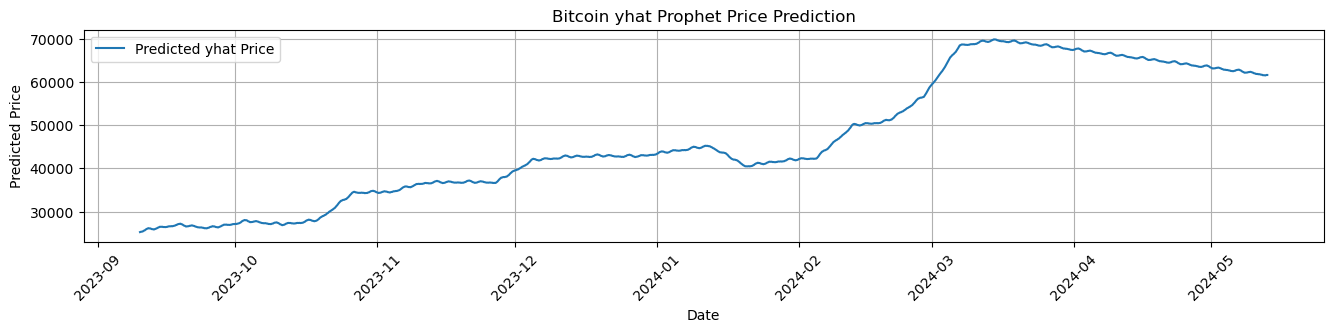

In [17]:
btc_yhat_df = btc_forecast[["ds", "yhat"]]

plt.figure(figsize=(16, 4))
plt.plot(btc_yhat_df['ds'], btc_yhat_df['yhat'], label='Predicted yhat Price')
plt.title('Bitcoin yhat Prophet Price Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.xticks(rotation = 45)
plt.grid(True)
plt.legend()
plt.subplots_adjust(bottom = 0.35)
plt.savefig('btc_forecast_yhat_graph.png')
plt.show()

# btc_trend_df = btc_forecast[["ds", "trend"]]

# plt.figure(figsize=(16, 4))
# plt.plot(btc_trend_df['ds'], btc_trend_df['trend'], label='Predicted Trend Price')
# plt.title('Bitcoin Trend Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Predicted Price')
# plt.xticks(rotation = 45)
# plt.grid(True)
# plt.legend()
# plt.show()


In [18]:
# Make a new dataframe that contains "time", "price" for Ethereum

eth_df_index_reset = eth_df.reset_index()

prophet_eth_df = eth_df_index_reset[["time", "price"]]

display(prophet_eth_df.head())


,time,price
0,2023-05-01 00:01:00,1877.16
1,2023-05-01 00:02:00,1875.02
2,2023-05-01 00:03:00,1879.31
3,2023-05-01 00:04:00,1881.91
4,2023-05-01 00:05:00,1880.48


In [19]:
# Reduce the dataframe to only include the most recent 6 months. 

eth_cutoff_date = prophet_eth_df['time'].max() - pd.DateOffset(months = 8)

prophet_eth_df_recent_8_months = prophet_eth_df[prophet_eth_df['time'] > eth_cutoff_date]

display(prophet_eth_df_recent_8_months.head())
display(prophet_eth_df_recent_8_months.tail())


,time,price
194355,2023-09-13 00:01:00,1592.28
194356,2023-09-13 00:02:00,1592.03
194357,2023-09-13 00:03:00,1591.19
194358,2023-09-13 00:04:00,1589.76
194359,2023-09-13 00:05:00,1589.77


,time,price
544234,2024-05-12 23:56:00,2930.55
544235,2024-05-12 23:57:00,2929.10
544236,2024-05-12 23:58:00,2927.80
544237,2024-05-12 23:59:00,2927.75
544238,2024-05-13 00:00:00,2929.27


In [20]:
# Prepare the eth data for Prophet

prophet_eth_df.columns = ["ds", "y"]

prophet_eth_df = prophet_eth_df.dropna()

prophet_eth_df.head()

,ds,y
0,2023-05-01 00:01:00,1877.16
1,2023-05-01 00:02:00,1875.02
2,2023-05-01 00:03:00,1879.31
3,2023-05-01 00:04:00,1881.91
4,2023-05-01 00:05:00,1880.48


In [21]:
# Fit the eth prophet data

eth_prophet = Prophet()

eth_prophet

In [22]:
eth_prophet.fit(prophet_eth_df)

14:01:43 - cmdstanpy - INFO - Chain [1] start processing
14:05:12 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
eth_future = eth_prophet.make_future_dataframe(periods = 72, freq = 'H')
eth_future.head()

,ds
0,2023-05-01 00:01:00
1,2023-05-01 00:02:00
2,2023-05-01 00:03:00
3,2023-05-01 00:04:00
4,2023-05-01 00:05:00


In [24]:
eth_forecast = eth_prophet.predict(btc_future)
display(eth_forecast.head())
display(eth_forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-10 04:21:00,1621.511568,1473.645349,1755.204942,1621.511568,1621.511568,-6.012381,-6.012381,-6.012381,-0.830893,-0.830893,-0.830893,-5.181488,-5.181488,-5.181488,0.0,0.0,0.0,1615.499187
1,2023-09-10 04:22:00,1621.510167,1461.115824,1762.650489,1621.510167,1621.510167,-6.001965,-6.001965,-6.001965,-0.822661,-0.822661,-0.822661,-5.179305,-5.179305,-5.179305,0.0,0.0,0.0,1615.508201
2,2023-09-10 04:23:00,1621.508765,1478.344008,1761.476424,1621.508765,1621.508765,-5.991317,-5.991317,-5.991317,-0.814202,-0.814202,-0.814202,-5.177115,-5.177115,-5.177115,0.0,0.0,0.0,1615.517448
3,2023-09-10 04:24:00,1621.507363,1478.047986,1768.684573,1621.507363,1621.507363,-5.980438,-5.980438,-5.980438,-0.805519,-0.805519,-0.805519,-5.174919,-5.174919,-5.174919,0.0,0.0,0.0,1615.526925
4,2023-09-10 04:25:00,1621.505961,1469.875849,1752.309148,1621.505961,1621.505961,-5.969331,-5.969331,-5.969331,-0.796613,-0.796613,-0.796613,-5.172718,-5.172718,-5.172718,0.0,0.0,0.0,1615.536630


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
349952,2024-05-13 00:20:00,3031.212538,2900.424888,3163.471643,3031.212538,3031.212538,2.462788,2.462788,2.462788,1.155673,1.155673,1.155673,1.307115,1.307115,1.307115,0.0,0.0,0.0,3033.675325
349953,2024-05-13 01:20:00,3030.863668,2886.798685,3181.706928,3030.863668,3030.863668,2.601915,2.601915,2.601915,0.863831,0.863831,0.863831,1.738084,1.738084,1.738084,0.0,0.0,0.0,3033.465582
349954,2024-05-13 02:20:00,3030.514798,2886.963157,3175.845043,3030.514798,3030.514798,2.086677,2.086677,2.086677,-0.074830,-0.074830,-0.074830,2.161507,2.161507,2.161507,0.0,0.0,0.0,3032.601474
349955,2024-05-13 03:20:00,3030.165928,2889.819095,3182.291337,3030.165928,3030.165928,1.716396,1.716396,1.716396,-0.857714,-0.857714,-0.857714,2.574109,2.574109,2.574109,0.0,0.0,0.0,3031.882324
349956,2024-05-13 04:20:00,3029.817058,2892.549111,3178.332485,3029.817058,3029.817058,2.133676,2.133676,2.133676,-0.838897,-0.838897,-0.838897,2.972573,2.972573,2.972573,0.0,0.0,0.0,3031.950735


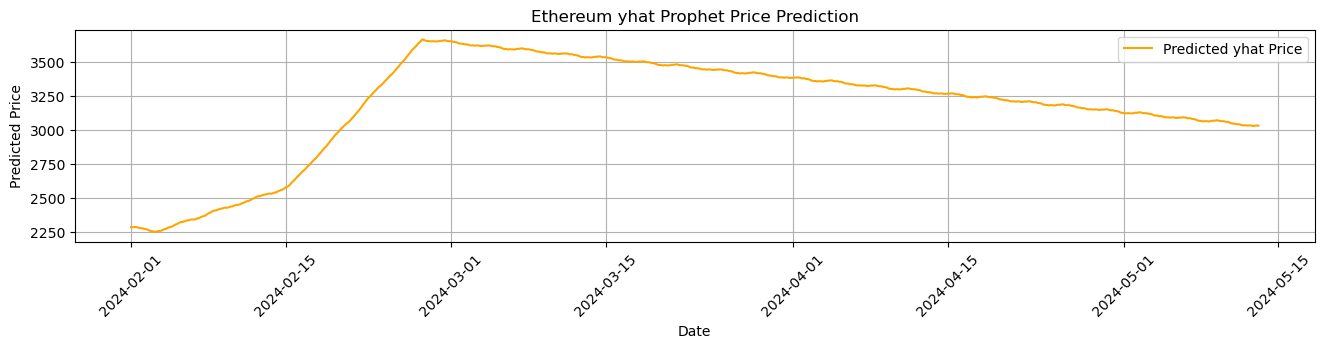

In [25]:
eth_forecast['ds'] = pd.to_datetime(eth_forecast['ds'])
eth_forecast.set_index('ds', inplace=True)

eth_forecast_yhat_graph = eth_forecast['2024-02-01':'2024-05-31'][['yhat']]

plt.figure(figsize=(16, 4))
plt.plot(eth_forecast_yhat_graph.index, eth_forecast_yhat_graph['yhat'], label='Predicted yhat Price', color="orange")
plt.title('Ethereum yhat Prophet Price Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.subplots_adjust(bottom=0.35)
plt.savefig('eth_forecast_yhat_graph.png')
plt.show()

# eth_trend_df = eth_forecast[["ds", "trend"]]

# plt.figure(figsize=(16, 4))
# plt.plot(eth_trend_df['ds'], eth_trend_df['trend'], label='Predicted Trend Price', color = "orange")
# plt.title('Ethereum Trend Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Predicted Price')
# plt.xticks(rotation = 45)
# plt.grid(True)
# plt.legend()
# plt.show()


In [26]:
# Make a new dataframe that contains "time", "price" for Dogecoin

doge_df_index_reset = doge_df.reset_index()

prophet_doge_df = doge_df_index_reset[["time", "price"]]

display(prophet_doge_df.head())


,time,price
0,2023-05-01 00:01:00,0.07954
1,2023-05-01 00:02:00,0.07945
2,2023-05-01 00:03:00,0.07960
3,2023-05-01 00:04:00,0.07970
4,2023-05-01 00:05:00,0.07968


In [27]:
# Reduce the dataframe to only include the most recent 6 months. 

doge_cutoff_date = prophet_doge_df['time'].max() - pd.DateOffset(months = 8)

prophet_doge_df_recent_8_months = prophet_doge_df[prophet_doge_df['time'] > doge_cutoff_date]

display(prophet_doge_df_recent_8_months.head())
display(prophet_doge_df_recent_8_months.tail())


,time,price
191380,2023-09-13 00:01:00,0.06086
191381,2023-09-13 00:02:00,0.06086
191382,2023-09-13 00:03:00,0.06082
191383,2023-09-13 00:04:00,0.06079
191384,2023-09-13 00:05:00,0.06084


,time,price
533078,2024-05-12 23:56:00,0.14128
533079,2024-05-12 23:57:00,0.14124
533080,2024-05-12 23:58:00,0.14116
533081,2024-05-12 23:59:00,0.14117
533082,2024-05-13 00:00:00,0.14134


In [28]:
# Prepare the eth data for Prophet

prophet_doge_df.columns = ["ds", "y"]

prophet_doge_df = prophet_doge_df.dropna()

prophet_doge_df.head()


,ds,y
0,2023-05-01 00:01:00,0.07954
1,2023-05-01 00:02:00,0.07945
2,2023-05-01 00:03:00,0.07960
3,2023-05-01 00:04:00,0.07970
4,2023-05-01 00:05:00,0.07968


In [29]:
# Fit the eth prophet data

doge_prophet = Prophet()

doge_prophet


In [30]:
doge_prophet.fit(prophet_doge_df)


14:28:19 - cmdstanpy - INFO - Chain [1] start processing
14:30:36 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
doge_future = doge_prophet.make_future_dataframe(periods = 72, freq = 'H')
doge_future.head()


,ds
0,2023-05-01 00:01:00
1,2023-05-01 00:02:00
2,2023-05-01 00:03:00
3,2023-05-01 00:04:00
4,2023-05-01 00:05:00


In [32]:
doge_forecast = doge_prophet.predict(doge_future)
display(doge_forecast.head())
display(doge_forecast.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-01 00:01:00,0.080099,0.065306,0.096329,0.080099,0.080099,0.000704,0.000704,0.000704,0.000070,0.000070,0.000070,0.000634,0.000634,0.000634,0.0,0.0,0.0,0.080803
1,2023-05-01 00:02:00,0.080098,0.063871,0.095654,0.080098,0.080098,0.000706,0.000706,0.000706,0.000071,0.000071,0.000071,0.000634,0.000634,0.000634,0.0,0.0,0.0,0.080804
2,2023-05-01 00:03:00,0.080098,0.065299,0.095313,0.080098,0.080098,0.000707,0.000707,0.000707,0.000072,0.000072,0.000072,0.000635,0.000635,0.000635,0.0,0.0,0.0,0.080805
3,2023-05-01 00:04:00,0.080097,0.064442,0.096225,0.080097,0.080097,0.000709,0.000709,0.000709,0.000073,0.000073,0.000073,0.000635,0.000635,0.000635,0.0,0.0,0.0,0.080806
4,2023-05-01 00:05:00,0.080097,0.065308,0.096667,0.080097,0.080097,0.000710,0.000710,0.000710,0.000075,0.000075,0.000075,0.000636,0.000636,0.000636,0.0,0.0,0.0,0.080807


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
533150,2024-05-15 20:00:00,0.163038,0.146140,0.178118,0.163038,0.163090,-0.001138,-0.001138,-0.001138,-0.000149,-0.000149,-0.000149,-0.000989,-0.000989,-0.000989,0.0,0.0,0.0,0.161900
533151,2024-05-15 21:00:00,0.163041,0.146197,0.176492,0.163041,0.163095,-0.001078,-0.001078,-0.001078,-0.000154,-0.000154,-0.000154,-0.000923,-0.000923,-0.000923,0.0,0.0,0.0,0.161963
533152,2024-05-15 22:00:00,0.163043,0.147817,0.177908,0.163043,0.163110,-0.000969,-0.000969,-0.000969,-0.000113,-0.000113,-0.000113,-0.000856,-0.000856,-0.000856,0.0,0.0,0.0,0.162074
533153,2024-05-15 23:00:00,0.163046,0.147381,0.177310,0.163046,0.163119,-0.000809,-0.000809,-0.000809,-0.000022,-0.000022,-0.000022,-0.000787,-0.000787,-0.000787,0.0,0.0,0.0,0.162237
533154,2024-05-16 00:00:00,0.163049,0.146324,0.179360,0.163049,0.163127,-0.000648,-0.000648,-0.000648,0.000069,0.000069,0.000069,-0.000717,-0.000717,-0.000717,0.0,0.0,0.0,0.162400


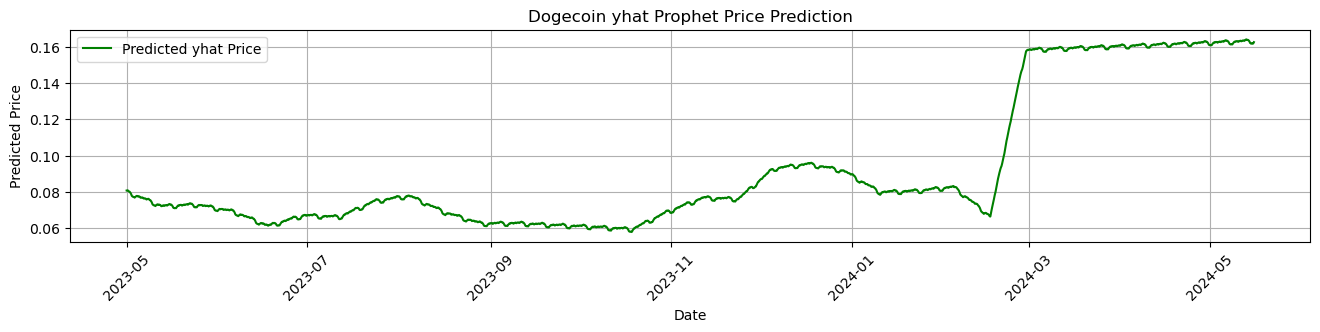

In [33]:
doge_yhat_df = doge_forecast[["ds", "yhat"]]

plt.figure(figsize=(16, 4))
plt.plot(doge_yhat_df['ds'], doge_yhat_df['yhat'], label='Predicted yhat Price', color = "green")
plt.title('Dogecoin yhat Prophet Price Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend()
plt.subplots_adjust(bottom = 0.35)
plt.savefig('doge_forecast_yhat_graph.png')
plt.show()

# doge_trend_df = doge_forecast[["ds", "trend"]]

# plt.figure(figsize=(16, 4))
# plt.plot(doge_trend_df['ds'], doge_trend_df['trend'], label='Predicted Trend Price', color = "green")
# plt.title('Dogecoin Trend Prophet Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Predicted Price')
# plt.xticks(rotation = 45)
# plt.grid(True)
# plt.legend()
# plt.show()


In [34]:
# # Overlay the btc yhat graph, eth yhat graph, and doge yhat graph

# btc_forecast.set_index('ds', inplace=True)
# eth_forecast.set_index('ds', inplace=True)
# doge_forecast.set_index('ds', inplace=True)

# forecast_yhat_df = pd.concat([
#     btc_forecast['yhat'].rename('BTC_yhat'), 
#     eth_forecast['yhat'].rename('ETH_yhat'), 
#     doge_forecast['yhat'].rename('DOGE_yhat')
# ], axis=1).dropna()

# display(forecast_yhat_df.head())
# display(forecast_yhat_df.tail())


In [35]:
# # plot the yhat predictions

# forecast_yhat_graph = forecast_yhat_df['2024-03-01':'2024-05-31']

# plt.figure(figsize=(16, 4))
# plt.plot(forecast_yhat_graph.index, forecast_yhat_graph['BTC_yhat'], label='Bitcoin yhat', linestyle='-')
# plt.plot(forecast_yhat_graph.index, forecast_yhat_graph['ETH_yhat'], label='Ethereum yhat', linestyle='--')
# plt.plot(forecast_yhat_graph.index, forecast_yhat_graph['DOGE_yhat'], label='Dogecoin yhat', linestyle='-.')

# plt.title("Bitcoin, Ethereum, and Dogecoin yhat Values")
# plt.xlabel("Date")
# plt.ylabel("yhat Value")
# plt.legend()
# plt.xticks(rotation = 45)
# plt.grid(True)
# plt.subplots_adjust(bottom = 0.35)
# plt.savefig('comparison_forecast_yhat_graph.png')
# plt.show()

